In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import kagglehub

In [ ]:
# Load Iris dataset
path_iris = kagglehub.dataset_download("himanshunakrani/iris-dataset")
f_path_iris = os.path.join(path_iris, 'iris.csv')
iris_df = pd.read_csv(f_path_iris)

# Separate features and labels
iris_features = iris_df.drop(columns=['species'])
iris_labels = iris_df['species']

iris_data = iris_features.values
weights = np.array([0.5, 0.5, 2.0, 1.5])  # α, β, γ, δ
iris_data = iris_data * np.sqrt(weights)  # Scaling for Euclidean distance

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris_features)
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_features.columns)

# Add the labels back for analysis
scaled_iris_df['species'] = iris_labels

100%|██████████| 0.98k/0.98k [00:00<00:00, 1.45MB/s]

Extracting files...


In [ ]:
print(scaled_iris_df.head())
print()
print(scaled_iris_df.describe())

   sepal_length  sepal_width  petal_length  petal_width species
0     -0.900681     1.032057     -1.341272    -1.312977  setosa
1     -1.143017    -0.124958     -1.341272    -1.312977  setosa
2     -1.385353     0.337848     -1.398138    -1.312977  setosa
3     -1.506521     0.106445     -1.284407    -1.312977  setosa
4     -1.021849     1.263460     -1.341272    -1.312977  setosa

       sepal_length   sepal_width  petal_length   petal_width
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -4.736952e-16 -6.631732e-16  3.315866e-16 -2.842171e-16
std    1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00
min   -1.870024e+00 -2.438987e+00 -1.568735e+00 -1.444450e+00
25%   -9.006812e-01 -5.877635e-01 -1.227541e+00 -1.181504e+00
50%   -5.250608e-02 -1.249576e-01  3.362659e-01  1.332259e-01
75%    6.745011e-01  5.692513e-01  7.627586e-01  7.905908e-01
max    2.492019e+00  3.114684e+00  1.786341e+00  1.710902e+00


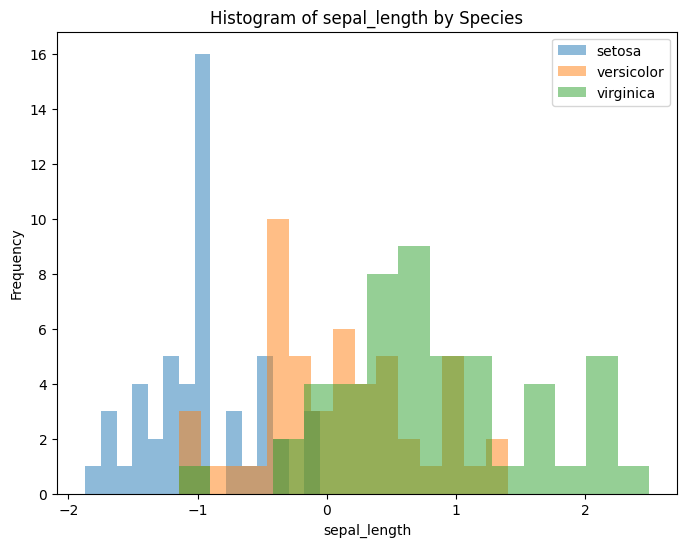

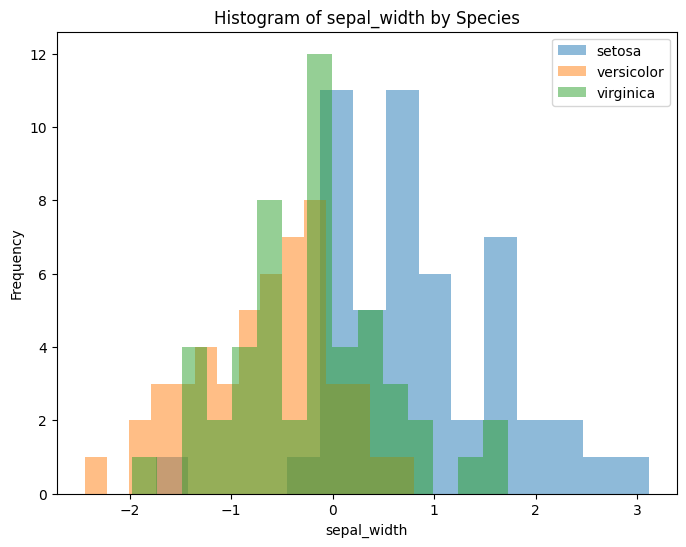

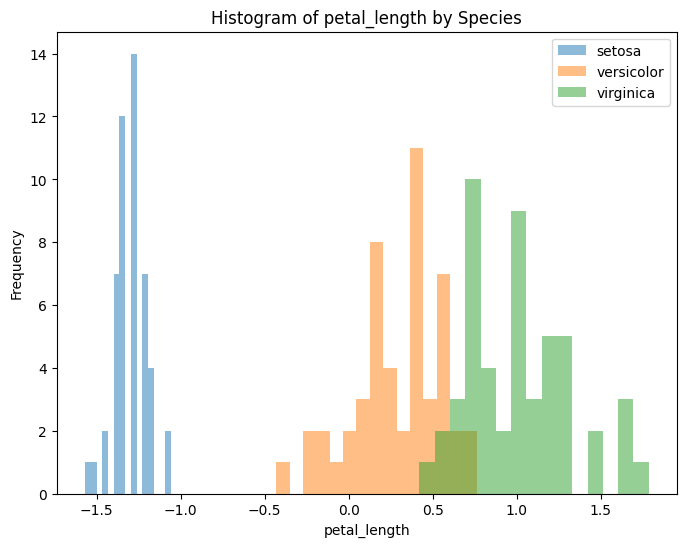

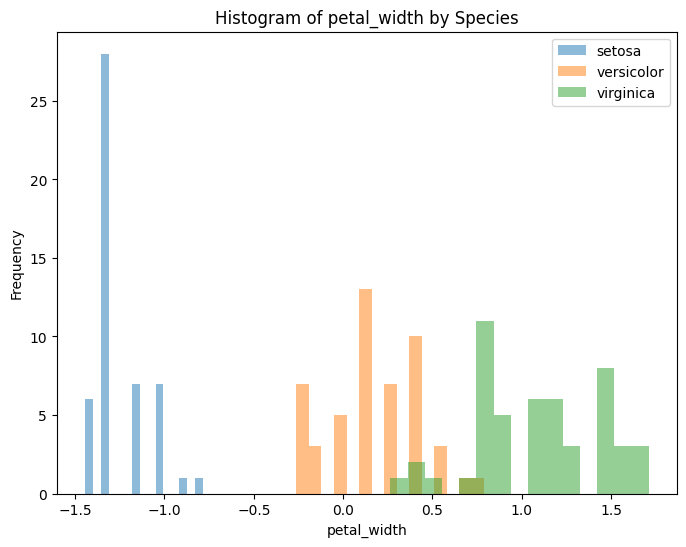

In [ ]:
# Plot histograms for each feature, separated by species
for feature in scaled_iris_df.columns[:-1]:  # Exclude 'species' column
    plt.figure(figsize=(8, 6))
    for species in scaled_iris_df['species'].unique():
        plt.hist(scaled_iris_df[scaled_iris_df['species'] == species][feature],
                 alpha=0.5, label=species, bins=15)
    plt.title(f'Histogram of {feature} by Species')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
# Analysis to find the most differentiating feature
mean_differences = {}
for feature in scaled_iris_df.columns[:-1]:
    means = scaled_iris_df.groupby('species')[feature].mean()
    abs_diffs = [
        np.abs(means.values[0] - means.values[1]),
        np.abs(means.values[0] - means.values[2]),
        np.abs(means.values[1] - means.values[2])
    ]
    mean_differences[feature] = np.max(abs_diffs)

most_differentiating_feature = max(mean_differences, key=mean_differences.get)
print(f"The attribute that most differentiates the three classes of Iris is: {most_differentiating_feature}")


The attribute that most differentiates the three classes of Iris is: petal_width


In [ ]:
# Scale the pedal_width and Pendal_length compared to the other data so that they will influence the clustering more

weights = np.array([0.5, 0.5, 2.0, 1.5])  # α, β, γ, δ
iris_data = iris_data * np.sqrt(weights)  # Scaling for Euclidean distance